# **Telecom X - Análisis de Evasión de Clientes**

---



* Proyecto: "Churn de clientes"
* Descripción:
 * La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

* Desafío:
 * Recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa

## **1.Cargar datos**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import requests
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Adicionamos los colores al proyecto
ROJO_1,	ROJO_2,	ROJO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BLANCO,GRIS_1, GRIS_2, GRIS_3, GRIS_4,	GRIS_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

## **📌 Extracción**

In [ ]:
url = 'https://raw.githubusercontent.com/WLozanoH/TelecomX-Data-Science-AL/main/TelecomX_Data.json'


# 1.  Descargar el texto del archivo
response = requests.get(url)
data = json.loads(response.text)

# 2. Verificar el tipo de dato: list o dict
print(f"Tipo de dato {type(data)}")

# 3. Analizar los datos segun el tipo de dato
if isinstance(data, list):
  pprint(data[0], depth=2)
elif isinstance(data, dict):
  pprint(data[0], depth=2)
else:
  print('Tipo de dato desconocido')


Tipo de dato <class 'list'>
{'Churn': 'No',
 'account': {'Charges': {...},
             'Contract': 'One year',
             'PaperlessBilling': 'Yes',
             'PaymentMethod': 'Mailed check'},
 'customer': {'Dependents': 'Yes',
              'Partner': 'Yes',
              'SeniorCitizen': 0,
              'gender': 'Female',
              'tenure': 9},
 'customerID': '0002-ORFBO',
 'internet': {'DeviceProtection': 'No',
              'InternetService': 'DSL',
              'OnlineBackup': 'Yes',
              'OnlineSecurity': 'No',
              'StreamingMovies': 'No',
              'StreamingTV': 'Yes',
              'TechSupport': 'Yes'},
 'phone': {'MultipleLines': 'No', 'PhoneService': 'Yes'}}


## **🔧 Transformación**

## **Normalizar el archivo JSON**

In [ ]:
# Normalizar el archivo JSON
df = pd.json_normalize(data,sep='.')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## **Conozce el conjunto de datos**

## **✅ Explorar las columnas del dataset y verificar sus tipos de datos.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## **✅ Consultar el diccionario para comprender mejor el significado de las variables.**

### **Diccionario de datos**

* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## **Manejo de inconsistencias**
normalizar todas los registros category y columnas a minúscula

In [ ]:
# Normalizar las columnas a minúsculas
df.columns=df.columns.str.lower()

# Aplicar minúsculas solo a columnas de tipo objeto (strings)
for col in df.select_dtypes(include='object'):
  df[col] = df[col].str.lower()

## **Comprobación de incoherencias en los datos**

* Convertir a su tipo de dato correcto

In [ ]:
# ✅ 1. Convertir columnas a tipo category y normalizar a minúsculas
col_cats = ['churn', 'customer.gender', 'customer.partner', 'customer.dependents',
            'phone.phoneservice', 'phone.multiplelines', 'internet.internetservice',
            'internet.onlinesecurity', 'internet.onlinebackup', 'internet.deviceprotection',
            'internet.techsupport', 'internet.streamingtv', 'internet.streamingmovies',
            'account.contract', 'account.paperlessbilling', 'account.paymentmethod']

df[col_cats] = df[col_cats].astype('category')

In [ ]:
#✅ 2. Asegurar que SeniorCitizen y tenure sean enteros (int64)
df['customer.seniorcitizen'] = df['customer.seniorcitizen'].astype('int64')
df['customer.tenure'] = df['customer.tenure'].astype('int64')

In [ ]:
# Corregir la variable 'account.Charges.Total'

In [ ]:
#✅ 3. Asegurar que los cargos sean flotantes (float64)
df['account.charges.monthly'] = df['account.charges.monthly'].astype('float64')

* Corregir la variable 'account.Charges.Total'

In [ ]:
# 1. Reemplazar los espacios en blanco por una expresion regular
df['account.charges.total'] = df['account.charges.total'].replace(r'^\s*$', pd.NA, regex=True)

# 2. Quitar los espacios en blanco al inicio y al final
df['account.charges.total'] = df['account.charges.total'].str.strip()

# # 3. Convertir a float (saltará los NaN automáticamente)
df['account.charges.total'] = pd.to_numeric(df['account.charges.total'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerid                 7267 non-null   object  
 1   churn                      7267 non-null   category
 2   customer.gender            7267 non-null   category
 3   customer.seniorcitizen     7267 non-null   int64   
 4   customer.partner           7267 non-null   category
 5   customer.dependents        7267 non-null   category
 6   customer.tenure            7267 non-null   int64   
 7   phone.phoneservice         7267 non-null   category
 8   phone.multiplelines        7267 non-null   category
 9   internet.internetservice   7267 non-null   category
 10  internet.onlinesecurity    7267 non-null   category
 11  internet.onlinebackup      7267 non-null   category
 12  internet.deviceprotection  7267 non-null   category
 13  internet.techsupport       7267 n

In [ ]:
df.describe()

,customer.seniorcitizen,customer.tenure,account.charges.monthly,account.charges.total
count,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.162653,32.346498,64.720098,2280.634213
std,0.369074,24.571773,30.129572,2268.632997
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,400.225000
50%,0.000000,29.000000,70.300000,1391.000000
75%,0.000000,55.000000,89.875000,3785.300000
max,1.000000,72.000000,118.750000,8684.800000


## **Verificando los valores nulos**

In [ ]:
# Verificando los valores nulos en 'account.Charges.Total'
nulos_act = df['account.charges.total'].isnull().sum()
print(f"La cantidad de nulos es: {nulos_act}")

La cantidad de nulos es: 11


* Dado que la cantidad de nulos es pequeña, menos del 5% del dataset,
usamos el metodo de imputacion con estadística avanzada usando la librería fancyimpute

In [ ]:
pip install fancyimpute #instalar la librería fancy (obligatorio)

## **Imputando los valores nulos**

In [ ]:
# Importar la librería
from fancyimpute import IterativeImputer

In [ ]:
 # 1. Copiar el DataFrame original
 df_impute = df.copy(deep=True)

# 2. Reshape de la columna a 2D antes de imputar
mice_imputer = IterativeImputer()

# .values.reshape(-1, 1) convierte la serie en una matriz columna
col_imputed = mice_imputer.fit_transform(df_impute[['account.charges.total']])

# 3. Reasignar la columna imputada al DataFrame
df_impute['account.charges.total'] = col_imputed

#Verificar que no haya valores nulos
nulos = df_impute['account.charges.total'].isnull().sum()
print(f"Total de nulos: {nulos}")

Total de nulos: 0


In [ ]:
# Asignar a la columna del dataframe original
df['account.charges.total'] = df_impute['account.charges.total']

## **Verificar duplicados**

In [ ]:
duplicados = df.duplicated().sum()
print(f"Cantidad de duplicados: {duplicados}")

Cantidad de duplicados: 0


# **Crear la Columna de cuentas diarias**
* "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [ ]:
df['cuentas_diarias'] = df['account.charges.monthly'] / 30
df['cuentas_diarias'].head()

,cuentas_diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667


## **Estandarización y transformación de datos**
* Descripción
 * Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

 * Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerid                 7267 non-null   object  
 1   churn                      7267 non-null   category
 2   customer.gender            7267 non-null   category
 3   customer.seniorcitizen     7267 non-null   int64   
 4   customer.partner           7267 non-null   category
 5   customer.dependents        7267 non-null   category
 6   customer.tenure            7267 non-null   int64   
 7   phone.phoneservice         7267 non-null   category
 8   phone.multiplelines        7267 non-null   category
 9   internet.internetservice   7267 non-null   category
 10  internet.onlinesecurity    7267 non-null   category
 11  internet.onlinebackup      7267 non-null   category
 12  internet.deviceprotection  7267 non-null   category
 13  internet.techsupport       7267 n

In [ ]:
#✅ 1. Conversión de valores textuales a binarios (Sí/No → 1/0)
# Lista de columnas binarias
cols_binarias = ['customer.partner', 'customer.dependents', 'phone.phoneservice',
                 'phone.multiplelines', 'internet.onlinesecurity', 'internet.onlinebackup',
                 'internet.deviceprotection', 'internet.techsupport',
                 'internet.streamingtv', 'internet.streamingmovies',
                 'account.paperlessbilling', 'churn']

# Ahora convierte 'yes' a 1 y 'no' a 0
df[cols_binarias] = df[cols_binarias].applymap(lambda x: 1 if x == 'yes' else 0)

# Finalmente, asegúrate de que las columnas sean de tipo 'int64'
df[cols_binarias] = df[cols_binarias].astype('int64')


In [ ]:
df.head()

,customerid,churn,customer.gender,customer.seniorcitizen,customer.partner,customer.dependents,customer.tenure,phone.phoneservice,phone.multiplelines,internet.internetservice,...,internet.deviceprotection,internet.techsupport,internet.streamingtv,internet.streamingmovies,account.contract,account.paperlessbilling,account.paymentmethod,account.charges.monthly,account.charges.total,cuentas_diarias
0,0002-orfbo,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.796667


In [ ]:

# Convertir las columnas a tipo int64
df[cols_binarias] = df[cols_binarias].astype('int64')

In [ ]:
# ✅ 2. Renombrar columnas a nombres más amigables
df.rename(columns={
    'customer.gender': 'genero',
    'customer.partner': 'tiene_pareja',
    'customer.dependents': 'tiene_dependientes',
    'account.paperlessbilling': 'factura_electronica',
    'churn': 'abandono',
    'account.charges.monthly': 'cargo_mensual',
    'account.charges.total': 'cargo_total',
    'customer.seniorcitizen': 'clientes senior (>=65 años)',
    'internet.deviceprotection': 'proteccion de dispositivo',
    'internet.onlinebackup': 'respaldo en linea',
    'internet.onlinesecurity': 'seguridad_en_linea',
    'internet.streamingmovies': 'streaming de peliculas',
    'internet.streamingtv': 'streaming de tv',
    'internet.techsupport': 'soporte tecnico',
    'phone.multiplelines': 'multiples lineas telefonicas',
    'phone.phoneservice': 'servicio telefonico',
    'customer.tenure': 'meses_de_contrato',
    'internet.internetservice': 'proveedor_de_internet',
    'account.contract': 'tipo_contrato',
    'account.paymentmethod': 'forma de pago'

}, inplace=True)

# Quitar los espacios de las columnas
df.columns = df.columns.str.replace(" ", "_")

In [ ]:
df.head()

,customerid,abandono,genero,clientes_senior_(>=65_años),tiene_pareja,tiene_dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,proveedor_de_internet,...,proteccion_de_dispositivo,soporte_tecnico,streaming_de_tv,streaming_de_peliculas,tipo_contrato,factura_electronica,forma_de_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-orfbo,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.796667


In [ ]:
#verificar tipo de dato correcto.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   customerid                    7267 non-null   object  
 1   abandono                      7267 non-null   int64   
 2   genero                        7267 non-null   category
 3   clientes_senior_(>=65_años)   7267 non-null   int64   
 4   tiene_pareja                  7267 non-null   int64   
 5   tiene_dependientes            7267 non-null   int64   
 6   meses_de_contrato             7267 non-null   int64   
 7   servicio_telefonico           7267 non-null   int64   
 8   multiples_lineas_telefonicas  7267 non-null   int64   
 9   proveedor_de_internet         7267 non-null   category
 10  seguridad_en_linea            7267 non-null   int64   
 11  respaldo_en_linea             7267 non-null   int64   
 12  proteccion_de_dispositivo     7267 non-null   in

## **📊 Carga y análisis**

## **Análisis Descriptivo**

In [ ]:
# Estadística descriptiva para las variables continuas
stats_continua= pd.concat([df[col].describe() for col in df.columns if df[col].dtype == 'float'], axis=1).T
stats_continua = pd.DataFrame(stats_continua)
#Formatear los números a 2 decimales
stats_continua = stats_continua.round(1)

print(f"## Estadísticas descriptivas(numéricas):\n")
print(stats_continua)

## Estadísticas descriptivas(numéricas):

                  count    mean     std   min    25%     50%     75%     max
cargo_mensual    7267.0    64.7    30.1  18.2   35.4    70.3    89.9   118.8
cargo_total      7267.0  2280.6  2266.9  18.8  401.4  1394.6  3778.5  8684.8
cuentas_diarias  7267.0     2.2     1.0   0.6    1.2     2.3     3.0     4.0


## **Frecuencia para las variables binarias**

In [ ]:
# Lista para guardar resultados
resultados = []

# Iterar en el dataframe
for col in df.columns:
  if df[col].dtype=='int' and df[col].nunique()==2:
    freqs= df[col].value_counts(normalize=True).sort_index()*100
    for valor, proporcion in freqs.items():
      resultados.append({'variable': col, 'valor': valor, 'proporcion (%)': round(proporcion, 2)})

# Convertir lista a DataFrame ordenado
tabla_binarias = pd.DataFrame(resultados)

# Mostrar tabla con variables en filas y valores en columnas
pivotado = tabla_binarias.pivot(index='variable', columns='valor', values='proporcion (%)')
# Renombrando la columna valor
pivotado.columns = [f'valor_{int(c)} (%)' for c in pivotado.columns]

#Mostrar los resultados
print(f"## Frecuencia para las variables binarias:\n")
print(pivotado)

## Frecuencia para las variables binarias:

                              valor_0 (%)  valor_1 (%)
variable                                              
abandono                            74.28        25.72
clientes_senior_(>=65_años)         83.73        16.27
factura_electronica                 40.68        59.32
multiples_lineas_telefonicas        57.82        42.18
proteccion_de_dispositivo           65.72        34.28
respaldo_en_linea                   65.54        34.46
seguridad_en_linea                  71.40        28.60
servicio_telefonico                  9.73        90.27
soporte_tecnico                     71.05        28.95
streaming_de_peliculas              61.25        38.75
streaming_de_tv                     61.61        38.39
tiene_dependientes                  69.99        30.01
tiene_pareja                        51.59        48.41


# **Distribución de evasión(churn)**

* comprender cómo está distribuida la variable "churn" (evasión) entre los clientes.
* Usar un gráfico de barras, dado que es una variable binaria

In [ ]:
# Extrayendo los valores
pivotado.loc['abandono'].values

array([74.28, 25.72])

In [ ]:
def proporcion_de_evasion():

  # 1.Contar la distribución de la variable evasión(churn/abandono)
  proporcion_evasion = df['abandono'].value_counts()
  # Establecer las etiquetas
  labels = ['Permanece', 'Abandona']

  # 2. Crear gráfico de pastel
  fig, ax = plt.subplots(figsize=(6,6), facecolor=GRIS_1)
  wedges, texts, autotexts = ax.pie(
                                proporcion_evasion,
                                labels=labels,
                                autopct='%1.1f%%',
                                startangle=180,
                                colors=[GRIS_3, AZUL_1],
                                wedgeprops={'width':0.4},
                                pctdistance=0.8,
                                explode=(0,0.01))

  # Estilo de fondo
  ax.set_facecolor(GRIS_1)
  ax.patch.set_color(GRIS_1)

  # Personalización de etiquetas y porcentajes
  for text, label in zip(texts, labels):
    text.set_color(AZUL_1 if label=='Abandona' else GRIS_3)
    text.set_fontsize(14)

  for i,text in enumerate(texts):
    if text.get_text() == 'Abandona':
      text.set_fontweight('bold')
      autotexts[i].set_fontweight('bold')

  for autotext in autotexts:
    autotext.set_color(BLANCO)
    autotext.set_fontsize(14)

  # Títulos y etiquetas
  ax.set_title('Evasión de clientes(%)', fontweight='bold', fontsize=18)

  # Ajustar gráfico y mostrar
  plt.tight_layout()
  return plt

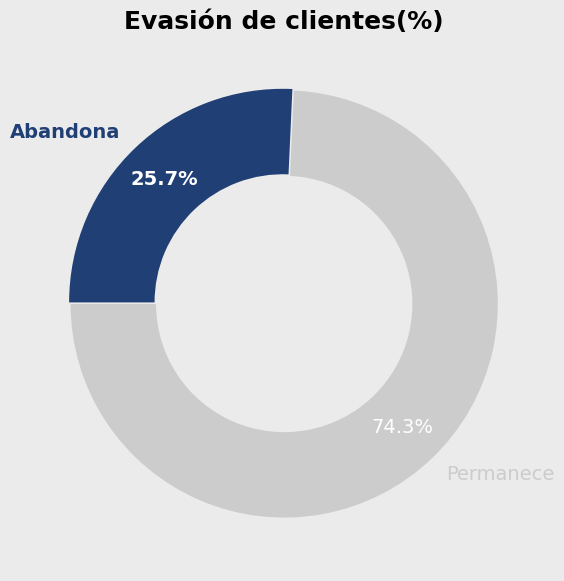

In [ ]:
proporcion_de_evasion().show()

## **Recuento de evasión por variables categóricas**

* Descripción:

 *  Explorar cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

 * Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

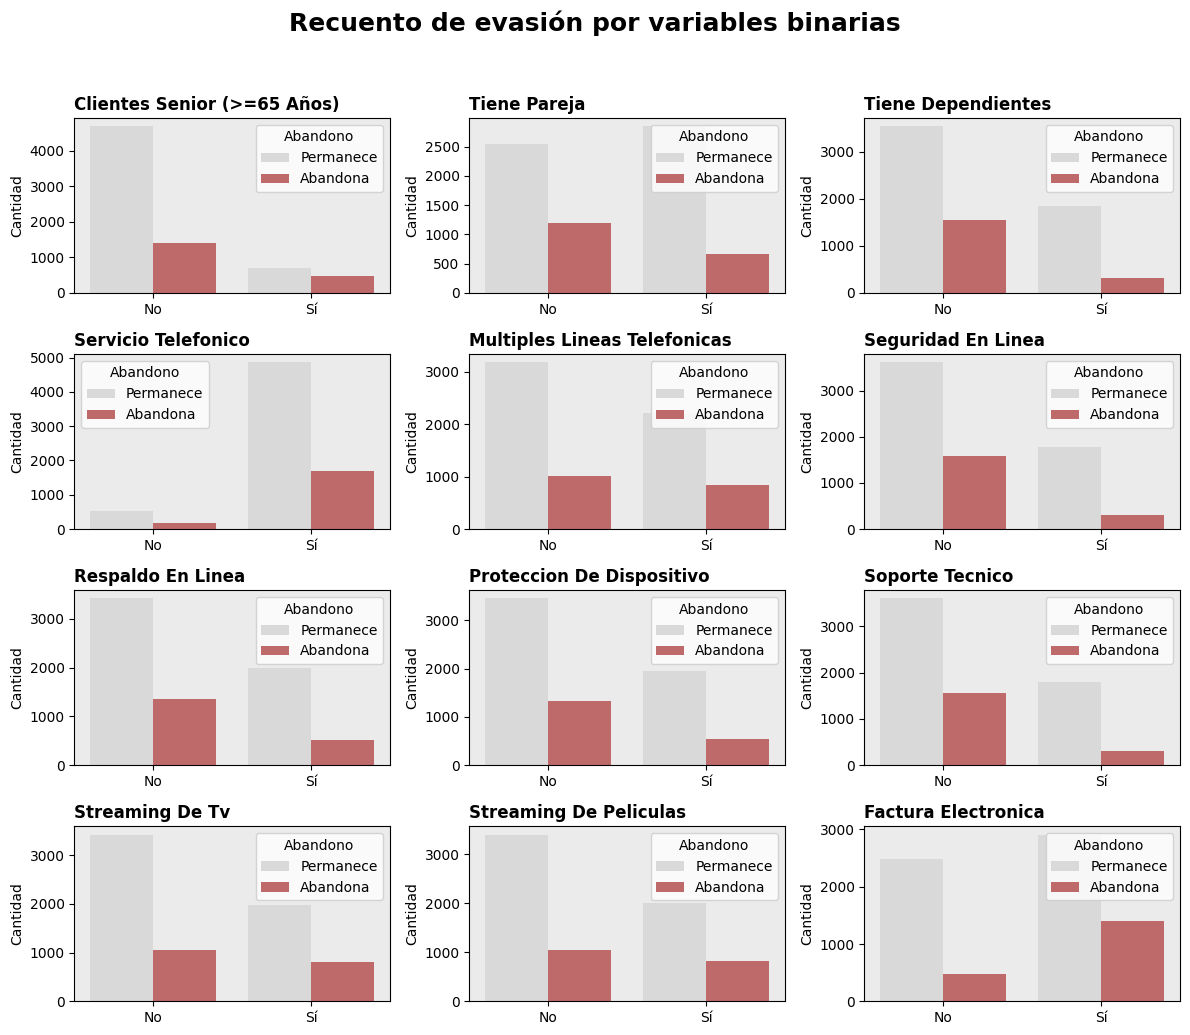

In [ ]:
# Lista de variables binarias a analizar
# Filtramos las columnas que sean de tipo 'int' y además tengas solo 2 valores(1:si, 0:no)
variables_x =[col for col in df.columns if df[col].dtype=='int' and df[col].nunique()==2 and col !='abandono']

# Crear figura con 3 filas y 4 columnas
fig, axes = plt.subplots(4,3,figsize=(12,10))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Recuento de evasión por variables binarias', fontsize=18, fontweight='bold', y=1.03)
axes = axes.flatten() # Aplanar array de ejes

# Recorrer las variables y graficar:
for i, var in enumerate(variables_x):
  ax = axes[i]
  sns.countplot(data=df, x=var, hue='abandono', ax=ax, palette={0: GRIS_2, 1: 'indianred'})

  # Convertir var a formato legible: reemplazar "_" y poner formato título
  titulo = var.replace("_", " ").title()
  ax.set_title(titulo, fontsize=12, loc='left', fontweight='bold')

  ax.set_ylabel('Cantidad')
  ax.set_xlabel('') # Quitar etiquetas del eje X
  ax.set_xticklabels(['No', 'Sí']) #Porque son variables binarias

# Estilo de fondo
  ax.set_facecolor(GRIS_1)
  ax.patch.set_color(GRIS_1)

# Cambiar etiquetas de la leyenda
  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles=handles, labels=['Permanece', 'Abandona'], title='Abandono')

# Ocultar subplots vacíos si hay más o menos variables binarias
for j in range(len(variables_x), len(axes)):
    fig.delaxes(axes[j])

#Ajustar y mostrar el gráfico
plt.tight_layout()
plt.show()


* Seleccionando las columnas con mayor cantidad de abandono:
  * 'seguridad_en_linea', 'respaldo_en_linea', 'proteccion_de_dispositivo', 'soporte_tecnico'.

In [ ]:
def recuento_evasion_clientes_binarias():

  # Filtrar las variables seguridad_en_linea, respaldo_en_linea, proteccion_de_dispositivo, soporte_tecnico
  variables_x =['seguridad_en_linea', 'respaldo_en_linea', 'proteccion_de_dispositivo', 'soporte_tecnico']

  # Crear figura con 3 filas y 4 columnas
  fig, axes = plt.subplots(2,2,figsize=(10,8))
  plt.subplots_adjust(hspace=0.5, wspace=0.3)
  fig.suptitle('Recuento de evasión de clientes', fontsize=18, fontweight='bold')
  axes = axes.flatten() # Aplanar array de ejes

  # Recorrer las variables y graficar:
  for i, var in enumerate(variables_x):
    ax = axes[i]
    sns.countplot(data=df, x=var, hue='abandono', ax=ax, palette={0: GRIS_2, 1: 'indianred'})
    titulo = var.replace("_", " ").title()
    ax.set_title(titulo, fontsize=12, fontweight='bold', loc='left')

    ax.set_ylabel('')
    ax.set_yticks([])
    ax.set_xlabel('') # Quitar etiquetas del eje X
    ax.set_xticklabels(['No', 'Sí']) #Porque son variables binarias

    # # Fondo
    ax.set_facecolor(GRIS_1)
    ax.patch.set_facecolor(GRIS_1)

    # Leyenda
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=['Permanece', 'Abandona'], title='Abandono')

    # Quitar bordes
    for spine in ax.spines.values():
      spine.set_visible(False)

      # Mostrar valores encima de todas las barras
    for bar in ax.patches:
        height = bar.get_height()
        if height > 0:
          ax.text(bar.get_x() + bar.get_width()/2,
                  height + 1,  # Posición justo encima
                  f'{int(height)}',
                  ha='center',
                  va='bottom',
                  fontsize=9,
                  fontweight='bold')

  #Ajustar y mostrar el gráfico
  plt.tight_layout()
  return plt

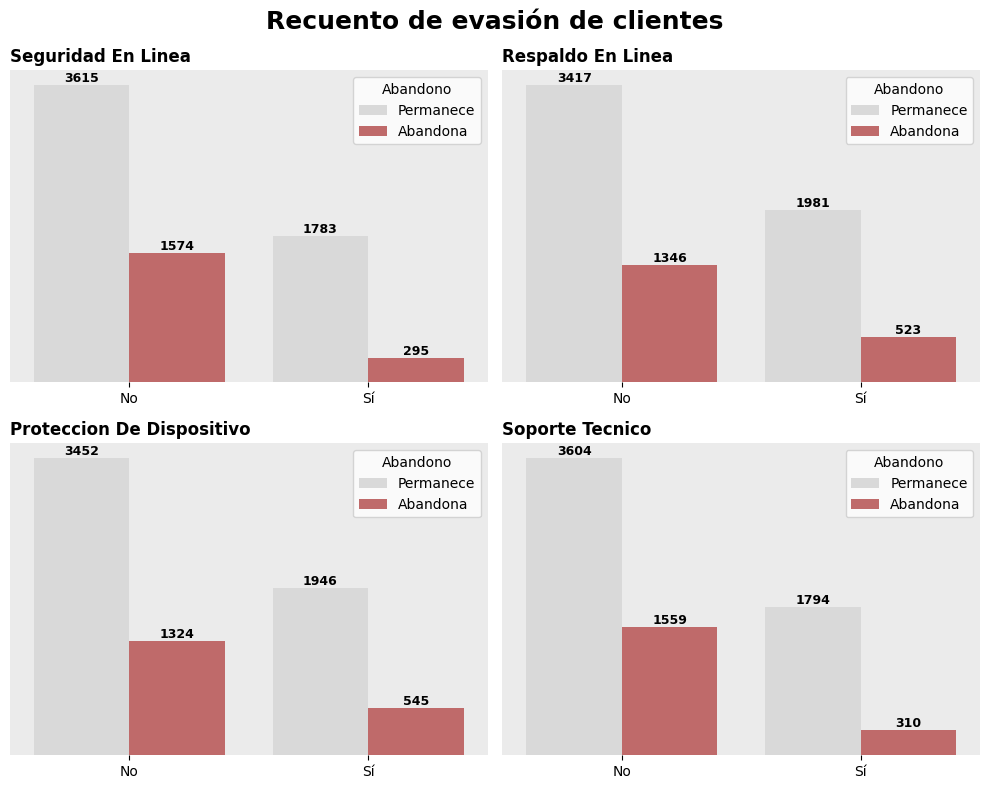

In [ ]:
recuento_evasion_clientes_binarias().show()

### **🔍 Observaciones de Recuento de evasión por variables binarias**

- Se observa una mayor proporción de evasión entre los clientes que **no cuentan con servicios adicionales** como:
 * Seguridad en Línea
 * Respaldo en Línea
 * Protección de dispositivo
 * Soporte técnico
 * streaming de tv y peliculas(similares)

 **Esto sugiere que los clientes con menos servicios contratados tienen una mayor tendencia a cancelar el servicio.**

 Además:
  **clientes sin pareja, ni dependientes y menores a 65 años** presentan una mayor proporción de evasión.

## **Recuento de evasión por variables categóricas**

In [ ]:
def recuento_evasion_clientes_categoricas():

  # Lista de variables binarias a analizar
  # Filtramos las columnas que sean de tipo 'category' y > 2 valores
  variables_x =[col for col in df.columns if df[col].dtype=='category' and df[col].nunique()>2]

  # Ajustar el estilo
  sns.set()

  # Crear figura con 3 filas y 4 columnas
  fig, axes = plt.subplots(1,3,figsize=(15,6))
  plt.subplots_adjust(hspace=0.5, wspace=0.3)
  fig.suptitle('Recuento de evasión por:', fontsize=18, fontweight='bold')
  axes = axes.flatten() # Aplanar array de ejes

  # Recorrer las variables y graficar:
  for i, var in enumerate(variables_x):
    ax = axes[i]
    sns.countplot(data=df, x=var, hue='abandono', ax=ax, palette={0: GRIS_2, 1: 'indianred'})

    # Título
    titulo = var.replace("_", " ").title()
    ax.set_title(titulo, fontsize=12, fontweight='bold', loc='left')

    #Ejes
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.tick_params(axis='x',rotation=-65)


  # Cambiar etiquetas de la leyenda
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=['No Abandona', 'Abandona'], title='Abandono')

  # Ocultar subplots vacíos si hay más o menos variables binarias
  for j in range(len(variables_x), len(axes)):
      fig.delaxes(axes[j])

  #Ajustar y mostrar el gráfico
  plt.tight_layout()

  return plt

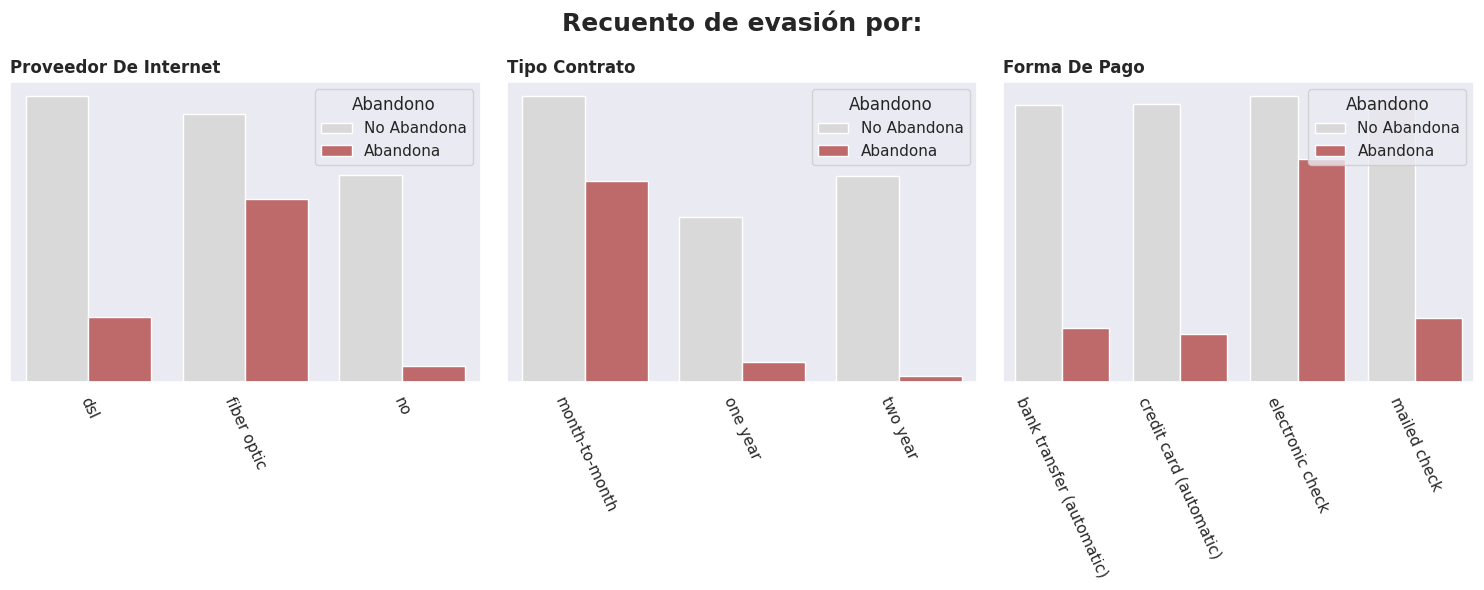

In [ ]:
recuento_evasion_clientes_categoricas().show()

### **🔍 Observaciones de Recuento de evasión por variables categóricas**

 * **Tipo de contrato**: Los clientes con **contratos mensuales tienen una tasa de abandono mayor**, en comparación con quienes tienen contrato a 1 año o 2 años, lo que indica que los contratos de mayor duración contribuyen a la retención de clientes.
 * **Forma de pago**: Los métodos de pago como **cheque electrónico y mailed checked** presentan una tasa de evasión más alta que los pagos automáticos, sugiriendo que la automatización del pago puede estar asociada a mayor fidelidad.
 * **Proveedor de internet:**: Los clientes con proveedor de tipo **fibra óptica** presentan una tasa de evasión más alta en comparación con los otros dos, lo cual podría estar relacionado a la calidad del servicio.

# **Conteo de evasión por variables numéricas**
* Descripción:
 * Explorar cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

In [ ]:
def recuento_evasion_clientes_numericas():

  # Seleccionar las variables numéricas
  variables_numericas = [col for col in df.select_dtypes(include='number').columns if col !='abandono' and df[col].nunique() !=2]

  sns.set_style("whitegrid") # ajustar el estilo
  # Crear figura
  fig, axes = plt.subplots(2,2, figsize=(12,5))
  fig.suptitle('Recuento de evasión de clientes por:', fontsize=18, fontweight='bold')
  plt.subplots_adjust(hspace=0.4)

  #Aplanar los ejes:
  axes = axes.flatten()

  #Graficar
  for i, var in enumerate(variables_numericas):
    ax = axes[i]
    sns.boxplot(data=df, x='abandono', y=var, palette={'0': GRIS_2, '1': 'indianred'},ax=ax)

    # Título
    titulo = var.replace("_", " ").title()
    ax.set_title(titulo, fontsize=13, fontweight='bold', loc='left')

    # Ejes
    ax.set_xlabel('')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Permanece', 'Abandona'])
    ax.set_ylabel(var.replace("_", " ").title(), fontsize=10)

    # Quitar bordes
    for spine in ax.spines.values():
      spine.set_visible(False)

  # Ajustar gráfico y mostrar
  plt.tight_layout()
  return plt


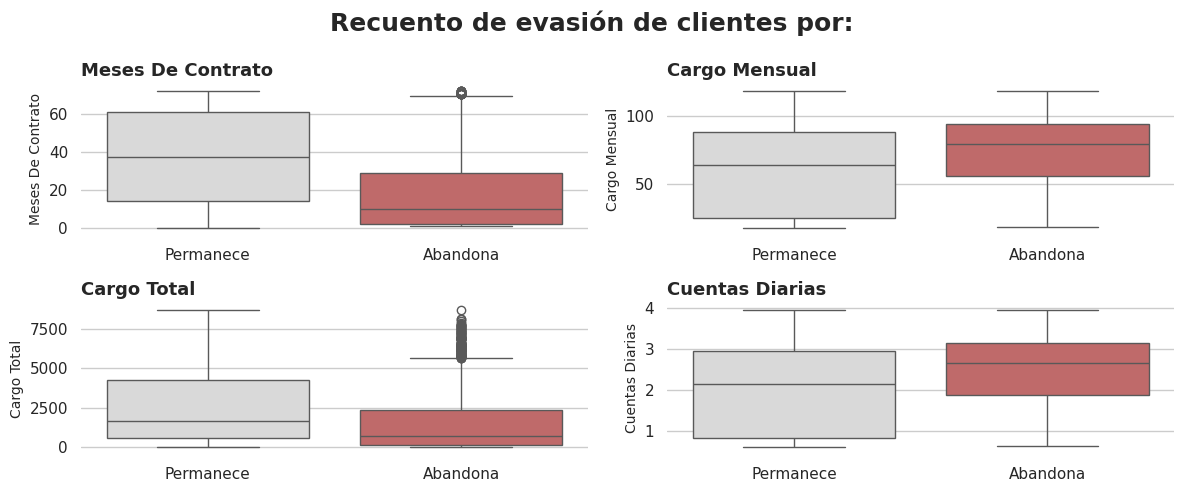

In [ ]:
recuento_evasion_clientes_numericas().show()

In [ ]:
# Seleccionar las variables numéricas
variables_numericas = [col for col in df.select_dtypes(include='number').columns if col !='abandono' and df[col].nunique() !=2]

# Obtener estadísticas descriptivas
df[df['abandono']==1][variables_numericas].describe()

,meses_de_contrato,cargo_mensual,cargo_total,cuentas_diarias
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,17.979133,74.441332,1531.796094,2.481378
std,19.531123,24.666053,1890.822994,0.822202
min,1.000000,18.850000,18.850000,0.628333
25%,2.000000,56.150000,134.500000,1.871667
50%,10.000000,79.650000,703.550000,2.655000
75%,29.000000,94.200000,2331.300000,3.140000
max,72.000000,118.350000,8684.800000,3.945000


🔍 Observaciones de Conteo de evasión por variables numéricas(gráfico de boxplot):
* Se aprecia una **tasa de abandono alta** en clientes con las siguientes características:
 * **Contrato menor a 18 meses**: la probabilidad de abandono es significativamente más alta en los primeros meses.
 * **Cuentas diarias entre 2.5 y 3.5**: este rango presenta un volumen considerable de cancelaciones.
 * **Cargo mensual entre 80 y 100**: los clientes con cargos mensuales elevados tienden a abandonar más.
 * **Cargo total de 1500** Clientes con un cargo total promedio de 1500 abandonan la empresa.

In [ ]:
# Seleccionamos las variables numericas + abandono en el dataframe y calcular la matriz correlacion,
# seleccionar solo la columna de correlaciones con 'abandono' y eliminarla dado que correlacionada con la misma siempre es 1
correlacion = df[variables_numericas + ['abandono']].corr()['abandono'].drop('abandono')
print(f"La matriz de correcion es:\n\n{correlacion}")

La matriz de correcion es:

meses_de_contrato   -0.344079
cargo_mensual        0.189866
cargo_total         -0.194389
cuentas_diarias      0.189866
Name: abandono, dtype: float64


#🔍 Resumen análisis de variables numericas por estado de abandono
* 1. **meses_de_contrato**:
 * Estadísticas:

   * Media: 17.98 meses
   * Mediana: 10 meses
   * Rango: 1 a 72 meses

 * Correlación: -0.344 (moderada negativa)
 * Interpretación:
   * Los clientes que abandonan la empresa suelen tener contratos relativamente cortos(18 meses en promedio). A mayor antiguedad, menor probabilidad de abandono, lo que indica que la fidelización es más débil en clientes nuevos.
 * **Insight clave**: Focalizar esfuerzos en retener a clientes jóvenes y mejorar su experiencia inicial.

* 2. **cargo_mensual**:

 * Estadísticas:

   * Media: 74
   * Mediana: 80
   * Rango: 19 a 118
 * Correlación: 0.19(débil positiva)
 * Interpretación:
   * Un cargo más alto se asocia con una leve mayor probabilidad de abandono. Esto puede indicar que clientes con tarifas más elevadas son más sensibles al precio.
 * **Insight clave**: Evaluar la percepción de valor y ajustar precios o beneficios para clientes con cargos altos.

* 3. **Cargo total**

 * Estadísticas:

   * Media: 1532
   * Mediana: 704
   * Rango: 19 a 8685

 * Correlación: -0.194 (débil negativa)

 * Interpretación:
   * Aunque el cargo mensual alto se asocia con más abandono, el cargo total mayor está vinculado a menor abandono. Esto refleja que clientes que han consumido más servicios o que llevan más tiempo pagando acumulan un cargo total alto y tienden a ser más leales.

 * **Insight clave**: Promover el consumo continuo para aumentar el cargo total y fomentar la retención.

 ## Conclusión general
 Los clientes que abandonan tienden a ser aquellos con contratos cortos y, en general, menor gasto acumulado, aunque pagan un cargo mensual algo más alto y usan más activamente el servicio. Las estrategias de retención deben enfocarse en mejorar la experiencia y el valor percibido de los clientes nuevos y de mayor gasto mensual, incentivando su fidelización a través del tiempo.





## **Exportar gráficas**

In [ ]:
def exportar_grafica(grafico, nombre):
    """
    Exporta una gráfica generada por una función que retorna plt.

    Parámetros:
    - grafico: función que genera el gráfico y retorna el objeto plt.
    - nombre: nombre con el que se guardará la imagen (sin extensión).
    """
    imagen = grafico()
    imagen.savefig(f'{nombre}.png', bbox_inches='tight', dpi=300)
    imagen.close()

In [ ]:
exportar_grafica(proporcion_de_evasion, 'gráfico_proporción_de_evasión')
exportar_grafica(recuento_evasion_clientes_binarias, 'gráfico_recuento_evasion_clientes_binarias')
exportar_grafica(recuento_evasion_clientes_categoricas, 'gráfico_recuento_evasion_clientes_categoricas')
exportar_grafica(recuento_evasion_clientes_numericas, 'gráfico_recuento_evasion_clientes_numericas')

## Exportar base de datos limpia (procesada)

In [123]:
try:
  df.to_csv('Data_churn_ML', index=False)
  print(f'Base para ML parte 2 Cargada correctamente...')
except Exception as e:
  print(f"Error al exportar la base de datos: {e}")

Base para ML parte 2 Cargada correctamente...


# **📄📊 Informe Final: Análisis de Evasión de Clientes – Telecom X**

---

![Gráfico de evasión](https://raw.githubusercontent.com/WLozanoH/TelecomX-Data-Science-AL/main/figures/gráfico_proporción_de_evasión.png)

##🔹 1.  **Introducción**

- La empresa Telecom X se enfrenta a un problema crítico de negocio: una alta tasa de **evasión de clientes**(también conocido como churn). Ésta situación afecta directamente a los ingresos recurrentes y crecimiento sostenido de la compañía.

- El objetivo de éste análisis es **identificar patrones y factores determinantes en el abandono del cliente**, mediante la exploracion de variables clave y proporcionar **insights accionables** que permitan a Telecom X reducir la tasa de abandono.

##🔹 2. **Limpieza y Tratamiento de Datos**
- El análisis se basó en un dataset proveniente de clientes de Telecom X. Las principales etapas de procesamiento fueron:
 * Extracción, carga, revisión inicial del dataset con pandas y normalización con json.
 * Manejo de inconsistencias: normalización de columnas y registros(a minúsculas).
 * validación de datos: convertir al tipo correcto de dato(int, binary, category, float).
 * Uso de expresiones regulares para corregir variables.
 * Imputación de valores nulos usando iterativeImputer() de la librería fancyimputer.
 * Eliminación y corrección de valores nulos, así como transformación del campo Total_Gasto a valores numéricos válidos.
* Crear la columna cuentas_diarias y renombrar todas las columnas a nombres más amigables.


##🔹3. **Análisis Exploratorio de Datos (EDA)**

* Se realizó un análisis exploratorio dividido por tipo de variables, acompañado de visualizaciones explicativas y segmentación por la variable abandono

 * 📌 **1. Variables Categóricas**
   * **Contratos mes a mes** presentan una tasa de abandono mucho mayor que los contratos a plazo fijo (un año o dos años).

  ![gráfico_recuento_evasion_clientes_numericas](https://raw.githubusercontent.com/WLozanoH/TelecomX-Data-Science-AL/main/figures/gráfico_recuento_evasion_clientes_numericas.png)

   * La falta de servicios adicionales como respaldo online, protección de dispositivos o soporte técnico se asocia con mayor churn(evasión de clientes).
   * Clientes con facturación electrónica y sin dependientes también muestran mayor tendencia al abandono.

  ![gráfico_recuento_evasion_clientes_binarias](https://raw.githubusercontent.com/WLozanoH/TelecomX-Data-Science-AL/main/figures/gráfico_recuento_evasion_clientes_binarias.png)

 * 📌 **2. Variables Numéricas**

  * **2.1. Meses de Contrato**
    * Media: 17.98 | Mediana: 10 | Correlación con abandono: -0.344 (moderada negativa)

    * ➤ Insight: Los clientes que abandonan tienen contratos significativamente más cortos. La fidelización en los primeros meses es crítica.

  * **2.1. Cargo Mensual**
   * Media: 74.44 | Mediana: 79.65 | Correlación con abandono: 0.190 (débil positiva)
   * ➤ Insight: Los clientes con cargos mensuales altos abandonan ligeramente más, lo que puede reflejar expectativas elevadas o sensibilidad al precio.

  * **2.3. Cargo Total**
   * Media: 1531.80 | Mediana: 703.55 | Correlación: -0.194 (débil negativa)
   * ➤ Insight: Los clientes con mayor gasto acumulado tienden a permanecer. Esto puede reflejar mayor tiempo de permanencia y mayor lealtad.

   ![gráfico_evasión](https://raw.githubusercontent.com/WLozanoH/TelecomX-Data-Science-AL/main/figures/gráfico_recuento_evasion_clientes_numericas.png)

## 🔹4. Conclusiones e Insights
* 📌Resumen de patrones detectados:

 * Antigüedad baja = mayor abandono: Clientes con menos de un año de contrato tienen alta propensión al churn(abandono de la empresa).
 * Mayor uso del servicio no garantiza fidelidad: Usuarios frecuentes presentan también tasas elevadas de abandono, posiblemente por expectativas no cubiertas
 * Cargos mensuales altos ≠ mayor satisfacción: Los clientes que pagan más no necesariamente son más leales, lo cual apunta a una brecha entre precio y percepción de valor.
 * Gasto total bajo = menor retención: Clientes con menor gasto acumulado son más propensos a irse, lo que sugiere baja integración o compromiso con el servicio.

 ## 🔹5. Recomendaciones
* 🎯 Estrategias de retención sugeridas:
 * **Fidelización temprana**: Diseñar campañas de onboarding y seguimiento personalizado durante los primeros 10 meses del cliente.
 * **Optimización del valor percibido**: Mejorar la percepción del servicio en planes con tarifas altas, incluyendo más beneficios o soporte.
 * **Incentivar el compromiso a largo plazo**: Promover upgrades a contratos anuales mediante descuentos, beneficios exclusivos o programas de lealtad.
 * **Monitoreo y soporte a usuarios intensivos**: Detectar a clientes con uso elevado del servicio y ofrecer atención proactiva y soporte técnico reforzado.